In [1]:
import os
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

from torch.nn import init

In [2]:
heart = pd.read_csv('./heart.csv')

__About this dataset__

1. Age : Age of the patient

2. Sex : Sex of the patient

3. cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain 비심장성 통증: 이런 경우, 흉통은 분명히 존재하지만, 심장에 이상이 없다고 판명이 날 때, 비심장성 흉통이라고 한다.
- Value 3: asymptomatic

4. trtbps : resting blood pressure (in mm Hg)

5. chol : cholestoral in mg/dl fetched via BMI sensor

6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach : maximum heart rate achieved

9. exng: exercise induced angina (1 = yes; 0 = no)

10. oldpeak: Previous peak | ST depression induced by exercise relative to rest

11. slp: Slope | the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

12. caa: number of major vessels (0-3)

13. thall: Thal rate (0-3) 

fixed defect - 고정 관류 결손 

reversible defect - 가역적인 관류 결손

target : 
- 0 = less chance of heart attack 
- 1 = more chance of heart attack

http://rstudio-pubs-static.s3.amazonaws.com/24341_184a58191486470cab97acdbbfe78ed5.html

### 데이터 분석

In [3]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [4]:
heart.describe() # 데이터 정보 보기 => 아무 parameter가 없으면 numeric 데이터에 대해서만 수행

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
heart['age'].describe() # 데이터 정보 보기 => pd.series에서도 사용이 가능하다.

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
28    65    0   2     140   417    1        0       157     0      0.8    2   
31    65    1   0     120   177    0        1       140     0      0.4    2   
38    65    0   2     155   269    0        1       148     0      0.8    2   
39    65    0   2     160   360    0        0       151     0      0.8    2   
181   65    0   0     150   225    0        0       114     0      1.0    1   
199   65    1   0     110   248    0        0       158     0      0.6    2   
218   65    1   0     135   254    0        0       127     0      2.8    1   
222   65    1   3     138   282    1        0       174     0      1.4    1   

     caa  thall  output  
28     1      2       1  
31     0      3       1  
38     0      2       1  
39     0      2       1  
181    3      3       0  
199    2      1       0  
218    1      3       0  
222    1      2       0  


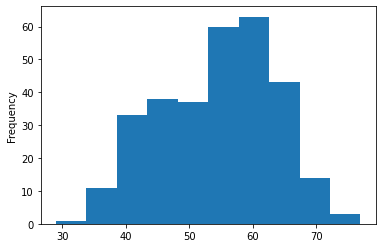

In [59]:
heart['age'].plot(kind='hist') # 나이
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html # 데이터 찾는 질의 사용법
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html # 데이터 정렬법
age = 65
print(heart.query('age == {}'.format(age))) # 데이터 찾기

In [7]:
print(heart['sex'].value_counts()) # 성별

1    207
0     96
Name: sex, dtype: int64


In [8]:
b = heart['sex'].value_counts().index.values # 데이터 값의 종류를 출력하는 법.
print(b)

[1 0]


In [9]:
print(heart['cp'].value_counts()) # 흉통 정도

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


<AxesSubplot:ylabel='Frequency'>

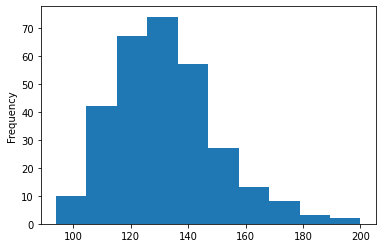

In [10]:
heart['trtbps'].plot(kind='hist') # 휴식기 혈압

<AxesSubplot:ylabel='Frequency'>

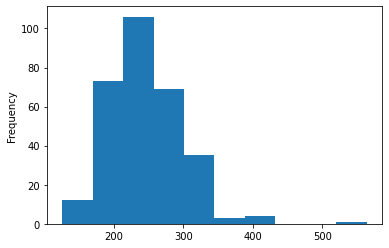

In [11]:
heart['chol'].plot(kind='hist') # 콜레스테롤

In [12]:
print(heart['fbs'].value_counts()) # 공복 혈당 수치 >120 over => 1

0    258
1     45
Name: fbs, dtype: int64


In [13]:
print(heart['thall'].value_counts()) # Thallium Test 결과 -> 운동부하 심전도 테스트

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [14]:
print(heart['thall'].value_counts()) # fixed defect - 고정 관류 결손 reversible defect - 가역적인 관류 결손

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [15]:
print(heart['restecg'].value_counts()) # 심전도 0: 정상 1 : ST-T 분절 2 : 좌심실 비대

1    152
0    147
2      4
Name: restecg, dtype: int64


<AxesSubplot:ylabel='Frequency'>

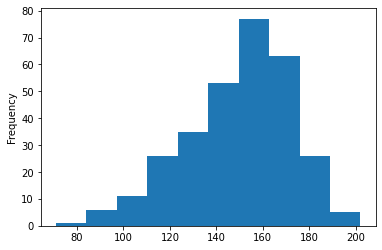

In [16]:
heart['thalachh'].plot(kind='hist') # 최대 심장 박동수 도달 횟수

In [17]:
print(heart['exng'].value_counts()) # 협심증을 유발하는 운동 여부

0    204
1     99
Name: exng, dtype: int64


<AxesSubplot:ylabel='Frequency'>

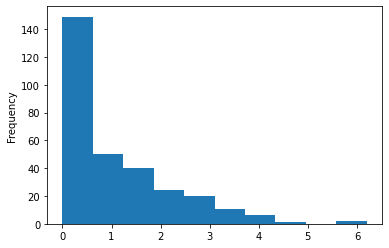

In [18]:
heart['oldpeak'].plot(kind='hist')

In [19]:
print(heart['slp'].value_counts()) # 운동 후 ST segment의 최대치의 움직임 (0 = upsloping; 1 = flat; 2 = downsloping)

2    142
1    140
0     21
Name: slp, dtype: int64


In [20]:
print(heart['caa'].value_counts())  # 심장의 주요 혈관 개수 number of major vessels

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


In [21]:
print(heart['output'].value_counts()) # 1: 발생가능 고위험군 0: 문제 없음

1    165
0    138
Name: output, dtype: int64


데이터는 0과 1로 나누는 binary_classification이다.

-> Decision Tree, Random Forest, Logistic Regression, DNN을 사용해 볼 수 있겠다.

## 1. 데이터 전처리 X

with sci-kit learn machine learning classifier

In [22]:
heart_data = heart.iloc[:,:-1] # 데이터
heart_label = heart.iloc[:,-1] # 라벨

In [23]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
train_X, test_X, train_Y, test_Y = train_test_split(heart_data, heart_label, test_size=0.3, random_state=15000) 

In [24]:
## 구현
class mymodel(nn.Module): 
    def __init__(self, is_train=True):        
        super(mymodel, self).__init__()
        ################################
        # 간단한 DNN모델 작성 
        self.l1 = nn.Sequential(
            torch.nn.Linear(13, 32),
            nn.ReLU(True),
            torch.nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            torch.nn.Linear(64, 32),
            nn.ReLU(True),
            torch.nn.Linear(32, 16),
            nn.ReLU(True),
            torch.nn.Linear(16, 1))
        ################################
                        
    def forward(self, x):        
        ################################
        x = self.l1(x)
        x = torch.sigmoid(x) # 최종 결과 값이 0 ~ 1 사이 값이 되도록 하기 위해 sigmoid activation 함수 사용.
        # 기본 값: softmax로 추정
        ################################        
        return x

my_model = mymodel() # 모델 생성

In [25]:
def print_network(model): # driver
    # 모델 모양 출력
    def _get_network_description(network): # workhorse
        '''Get the string and total parameters of the network'''
        if isinstance(network, nn.DataParallel):
            network = network.module
        s = str(network)
        n = sum(map(lambda x: x.numel(), network.parameters()))
        return s, n
    s, n = _get_network_description(model)
    if isinstance(model, nn.DataParallel):
        net_struc_str = '{} - {}'.format(model.__class__.__name__, model.module.__class__.__name__)
    else: net_struc_str = '{}'.format(model.__class__.__name__)
    log = 'Network structure: {}, with parameters: {:,d}'.format(net_struc_str, n)
    return log, s


log, architecture = print_network(my_model)
print(log)
print(architecture)

Network structure: mymodel, with parameters: 5,185
mymodel(
  (l1): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=64, out_features=32, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=32, out_features=16, bias=True)
    (8): ReLU(inplace=True)
    (9): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [26]:
def train(model, train_data, train_label,test_data, test_label, epochs = 100):
    # 학습 진행
    running_loss = 0.0 # 손실 함수 값.
    criterion = nn.BCELoss() # 손실함수 -> Binary Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer로 Adam을 사용. Learning rate = 0.001
    for epoch in range(epochs): # 학습 횟수동안 학습을 반복
        total = 0; # 정확도 확인용 전체 데이터 개수
        correct = 0; # 예측과 일치하는 데이터 개수
        for index, data in enumerate(train_data.values): # 데이터 1개씩 학습 진행.
            # 데이터가 학습 모델에 들어갈 수 있는 Tensor로 변환 모양은 -> Tensor [13]
            data = torch.from_numpy(data) 
            # 손실 계산이 가능하도록 라벨 역시 Tensor로 변환 모양은 T-ensor -> [1]
            label = torch.Tensor([float(train_label.values[index])]) 
            data = data.float() # float형으로 강제 변환
            optimizer.zero_grad() # 학습을 위해 grad값 초기화
            output = model(data) # 모델에 데이터를 넣어서 예측(Forward Propagation)
            loss = criterion(output, label) # 예측과 실제를 비교해서 손실값 계산
            loss.backward() # 오차 역전파(Back Propagation)
            optimizer.step() # 다음 step 진행
            running_loss += loss.item() # 현재 손실값 추가 => 학습 당 손실 값 출력을 위함
            pred = [0. if output < 0.5 else 1.] # 확률 반올림을 통해 판단
            total = total + 1 # 전체 데이터 개수 세기
            if(pred[0] == label[0]): # 예측 데이터와 실제 데이터 일치하는 경우
                correct = correct + 1 # 정답 + 1
        print("epoch {0}: 정확도:{1:.4}, 손실:{2:.6}".format(epoch,correct/total, running_loss)) # 정확도와 손실 출력
        running_loss = 0.0
        if epoch > 0 and epoch % 10 == 0:
            test(model,test_data, test_label) # epoch 10번마다 테스트 실행
    print("End Training!")

In [27]:
def test(model,test_data, test_label):
    total = len(test_data) # 테스트 데이터 전체 개수
    correct = 0 # 정답 개수
    with torch.no_grad(): # grad 미실시 -> train이 아니기 때문
        for index, data in enumerate(test_data.values):# 데이터 1개씩 예측 진행.
            # 데이터가 학습 모델에 들어갈 수 있는 Tensor로 변환 모양은 -> Tensor [13]
            data = torch.from_numpy(data) 
            # 라벨 역시 Tensor로 변환 모양은 T-ensor -> [1]
            label = torch.Tensor([float(test_label.values[index])])
            data = data.float() # float형으로 강제 변환
            output = model(data) # 모델에 데이터를 넣어서 예측(Forward Propagation)
            pred = [0. if output < 0.5 else 1.] # 확률 반올림을 통해 판단
            if(pred[0] == label[0]): # 예측 데이터와 실제 데이터 일치하는 경우
                correct = correct + 1 # 정답 + 1
        print("테스트 데이터 정확도:{0:.4}".format(correct/total)) # 정확도 출력

In [28]:
train(my_model,train_X, train_Y,test_X,test_Y)

epoch 0: 정확도:0.5236, 손실:167.5
epoch 1: 정확도:0.5236, 손실:152.076
epoch 2: 정확도:0.6179, 손실:140.535
epoch 3: 정확도:0.6179, 손실:139.115
epoch 4: 정확도:0.6651, 손실:132.906
epoch 5: 정확도:0.6651, 손실:132.477
epoch 6: 정확도:0.717, 손실:120.874
epoch 7: 정확도:0.7264, 손실:120.588
epoch 8: 정확도:0.7594, 손실:117.281
epoch 9: 정확도:0.7406, 손실:115.299
epoch 10: 정확도:0.7547, 손실:112.022
테스트 데이터 정확도:0.6484
epoch 11: 정확도:0.7594, 손실:107.211
epoch 12: 정확도:0.7642, 손실:110.715
epoch 13: 정확도:0.7877, 손실:105.419
epoch 14: 정확도:0.7689, 손실:104.015
epoch 15: 정확도:0.783, 손실:98.9942
epoch 16: 정확도:0.7877, 손실:101.423
epoch 17: 정확도:0.7972, 손실:97.6005
epoch 18: 정확도:0.7877, 손실:93.3071
epoch 19: 정확도:0.7877, 손실:97.0522
epoch 20: 정확도:0.8208, 손실:89.33
테스트 데이터 정확도:0.7143
epoch 21: 정확도:0.783, 손실:89.9781
epoch 22: 정확도:0.7877, 손실:91.5372
epoch 23: 정확도:0.7925, 손실:88.3072
epoch 24: 정확도:0.8113, 손실:84.5358
epoch 25: 정확도:0.8019, 손실:85.4356
epoch 26: 정확도:0.8113, 손실:83.2805
epoch 27: 정확도:0.816, 손실:82.7328
epoch 28: 정확도:0.8302, 손실:76.9983
epoch 29: 정확도:0.816, 손실

In [29]:
test(my_model,test_X, test_Y)

테스트 데이터 정확도:0.7143


출처: https://rfriend.tistory.com/257 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

## 2. 데이터 정규화 진행

1. thalachh

2. trtbps

3. chol

에 대해 정규화 진행

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Pandas Series로 뽑으면 데이터가 1차원 데이터가 된다 -> Scaler에 넣기 위해서는 Pandas DataFrame을 만들어야 하는데
# DataFrame 만드는 방법에 Series를 넣어서 만드는 방법이 있네... to_frame...
# 아래 방식은 Pandas Series로 부터 nparray를 추출, 이를 Scaler에 fit & tranform하여 데이터 프레임으로 만들어서
# 기존 DataFrame에 update로 데이터 바꾸는 방식
thalachh = heart['thalachh'].values.reshape(-1,1)
trtbps = heart['trtbps'].values.reshape(-1,1)
chol = heart['chol'].values.reshape(-1,1)

1. MinMaxScaler

In [32]:
mm_norm = MinMaxScaler() # 최소-최대 스케일러

In [33]:
# 스케일러 적용
mm_thalachh = mm_norm.fit_transform(thalachh) 
mm_trtbps = mm_norm.fit_transform(trtbps)
mm_chol = mm_norm.fit_transform(chol)

In [34]:
# 각각의 스케일링 된 데이터를 데이터 프레임으로 만듬.
thalachh = pd.DataFrame(mm_thalachh,columns=['thalachh'])
trtbps = pd.DataFrame(mm_thalachh,columns=['trtbps'])
chol = pd.DataFrame(mm_thalachh,columns=['chol'])

In [35]:
# 기존 데이터에서 deep copy로 dataframe을 복사하여 새 dataframe을 만듬
mm_heart = heart.copy()

In [36]:
mm_heart.head() # 복사 확인

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [37]:
 # 3개의 column에 대해 각각 update를 통해 값을 갱신
mm_heart.update(thalachh)
mm_heart.update(trtbps)
mm_heart.update(chol)
mm_heart.head() # 변경 확인.

age  sex  cp    trtbps      chol  fbs  restecg  thalachh  exng  oldpeak  \
0   63    1   3  0.603053  0.603053    1        0  0.603053     0      2.3   
1   37    1   2  0.885496  0.885496    0        1  0.885496     0      3.5   
2   41    0   1  0.770992  0.770992    0        0  0.770992     0      1.4   
3   56    1   1  0.816794  0.816794    0        1  0.816794     0      0.8   
4   57    0   0  0.702290  0.702290    0        1  0.702290     1      0.6   

   slp  caa  thall  output  
0    0    0      1       1  
1    0    0      2       1  
2    2    0      2       1  
3    2    0      2       1  
4    2    0      2       1

In [38]:
mm_heart_data = mm_heart.iloc[:,:-1] # 데이터
mm_heart_label = mm_heart.iloc[:,-1] # 라벨

In [39]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
mm_train_X, mm_test_X, mm_train_Y, mm_test_Y = train_test_split(mm_heart_data, mm_heart_label, test_size=0.3, random_state=123 ,stratify = mm_heart_label)

In [40]:
mm_model = mymodel() # 모델 생성

In [41]:
train(mm_model,mm_train_X, mm_train_Y,mm_test_X, mm_test_Y) # 모델 학습

epoch 0: 정확도:0.4953, 손실:147.834
epoch 1: 정확도:0.533, 손실:146.574
epoch 2: 정확도:0.5377, 손실:146.89
epoch 3: 정확도:0.5896, 손실:142.548
epoch 4: 정확도:0.717, 손실:130.478
epoch 5: 정확도:0.783, 손실:106.131
epoch 6: 정확도:0.8208, 손실:93.9751
epoch 7: 정확도:0.8113, 손실:92.2457
epoch 8: 정확도:0.8208, 손실:91.8525
epoch 9: 정확도:0.8208, 손실:95.3675
epoch 10: 정확도:0.8349, 손실:84.446
테스트 데이터 정확도:0.8022
epoch 11: 정확도:0.8349, 손실:85.8753
epoch 12: 정확도:0.8066, 손실:90.7008
epoch 13: 정확도:0.8113, 손실:90.4183
epoch 14: 정확도:0.8585, 손실:84.7676
epoch 15: 정확도:0.8302, 손실:83.6723
epoch 16: 정확도:0.8113, 손실:93.1768
epoch 17: 정확도:0.8208, 손실:87.8971
epoch 18: 정확도:0.8396, 손실:82.7243
epoch 19: 정확도:0.816, 손실:85.3471
epoch 20: 정확도:0.8443, 손실:81.866
테스트 데이터 정확도:0.7473
epoch 21: 정확도:0.8255, 손실:86.4103
epoch 22: 정확도:0.8443, 손실:82.4216
epoch 23: 정확도:0.8113, 손실:89.873
epoch 24: 정확도:0.8255, 손실:85.1532
epoch 25: 정확도:0.8396, 손실:81.3387
epoch 26: 정확도:0.8349, 손실:81.7682
epoch 27: 정확도:0.8443, 손실:79.8698
epoch 28: 정확도:0.8443, 손실:80.4018
epoch 29: 정확도:0.8302, 손

In [42]:
test(mm_model,mm_test_X, mm_test_Y) # 모델 테스트

테스트 데이터 정확도:0.7802


2. StandardScaler

In [43]:
# Pandas Series로 뽑으면 데이터가 1차원 데이터가 된다 -> Scaler에 넣기 위해서는 Pandas DataFrame을 만들어야 하는데
# DataFrame 만드는 방법에 Series를 넣어서 만드는 방법이 있네... to_frame...
# 아래 방식은 Pandas Series로 부터 nparray를 추출, 이를 Scaler에 fit & tranform하여 데이터 프레임으로 만들어서
# 기존 DataFrame에 update로 데이터 바꾸는 방식
thalachh = heart['thalachh'].values.reshape(-1,1)
trtbps = heart['trtbps'].values.reshape(-1,1)
chol = heart['chol'].values.reshape(-1,1)

In [44]:
std_norm = StandardScaler() # 정규화 스케일러

In [45]:
# 스케일러 적용
std_thalachh = std_norm.fit_transform(thalachh)
std_trtbps = std_norm.fit_transform(trtbps)
std_chol = std_norm.fit_transform(chol)

In [46]:
# 각각의 스케일링 된 데이터를 데이터 프레임으로 만듬.
thalachh = pd.DataFrame(std_thalachh,columns=['thalachh'])
trtbps = pd.DataFrame(std_trtbps,columns=['trtbps'])
chol = pd.DataFrame(std_chol,columns=['chol'])

In [47]:
# 기존 데이터에서 deep copy로 dataframe을 복사하여 새 dataframe을 만듬
std_heart = heart.copy()

In [48]:
std_heart.head() # 복사 확인

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [49]:
 # 3개의 column에 대해 각각 update를 통해 값을 갱신
std_heart.update(thalachh)
std_heart.update(trtbps)
std_heart.update(chol)
std_heart.head() # 변경 확인.

age  sex  cp    trtbps      chol  fbs  restecg  thalachh  exng  oldpeak  \
0   63    1   3  0.763956 -0.256334    1        0  0.015443     0      2.3   
1   37    1   2 -0.092738  0.072199    0        1  1.633471     0      3.5   
2   41    0   1 -0.092738 -0.816773    0        0  0.977514     0      1.4   
3   56    1   1 -0.663867 -0.198357    0        1  1.239897     0      0.8   
4   57    0   0 -0.663867  2.082050    0        1  0.583939     1      0.6   

   slp  caa  thall  output  
0    0    0      1       1  
1    0    0      2       1  
2    2    0      2       1  
3    2    0      2       1  
4    2    0      2       1

In [50]:
std_heart_data = std_heart.iloc[:,:-1] # 데이터
std_heart_label = std_heart.iloc[:,-1] # 라벨

In [51]:
from sklearn.model_selection import train_test_split
# 학습, 테스트 데이터 분리
std_train_X, std_test_X, std_train_Y, std_test_Y = train_test_split(std_heart_data, std_heart_label, test_size=0.3, random_state=123 ,stratify = std_heart_label)

In [52]:
std_model = mymodel() # 모델 생성

In [53]:
train(std_model,std_train_X, std_train_Y,std_test_X, std_test_Y) # 모델 학습

epoch 0: 정확도:0.5, 손실:147.302
epoch 1: 정확도:0.717, 손실:137.451
epoch 2: 정확도:0.7547, 손실:115.259
epoch 3: 정확도:0.7877, 손실:106.928
epoch 4: 정확도:0.8066, 손실:95.605
epoch 5: 정확도:0.8113, 손실:97.7235
epoch 6: 정확도:0.8066, 손실:98.3944
epoch 7: 정확도:0.8208, 손실:89.1987
epoch 8: 정확도:0.7972, 손실:96.599
epoch 9: 정확도:0.783, 손실:95.9603
epoch 10: 정확도:0.8255, 손실:88.567
테스트 데이터 정확도:0.7692
epoch 11: 정확도:0.8255, 손실:88.3836
epoch 12: 정확도:0.8349, 손실:83.7934
epoch 13: 정확도:0.8302, 손실:83.0077
epoch 14: 정확도:0.8443, 손실:81.3247
epoch 15: 정확도:0.8396, 손실:81.5574
epoch 16: 정확도:0.8538, 손실:83.0784
epoch 17: 정확도:0.8396, 손실:82.6861
epoch 18: 정확도:0.8585, 손실:79.0969
epoch 19: 정확도:0.8396, 손실:80.8863
epoch 20: 정확도:0.8349, 손실:81.3958
테스트 데이터 정확도:0.7692
epoch 21: 정확도:0.816, 손실:84.6244
epoch 22: 정확도:0.8349, 손실:81.4061
epoch 23: 정확도:0.8255, 손실:81.389
epoch 24: 정확도:0.8443, 손실:79.2961
epoch 25: 정확도:0.8491, 손실:76.1453
epoch 26: 정확도:0.8302, 손실:80.9532
epoch 27: 정확도:0.8443, 손실:76.8725
epoch 28: 정확도:0.8396, 손실:78.5083
epoch 29: 정확도:0.8396, 손실:

In [54]:
test(std_model,std_test_X, std_test_Y)  # 모델 테스트

테스트 데이터 정확도:0.8242
